In [ ]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
OMDB_API_KEY = '2a24d970'

def fetch_episode_ratings(show_name):
    # Use t= for exact title match:
    search_url = f"http://www.omdbapi.com/?apikey={OMDB_API_KEY}&t={show_name}&type=series"
    search_response = requests.get(search_url)
    data = search_response.json()
    print(data)  # Debug output

    if data.get('Response') == 'False':
        raise ValueError(f"Show not found: {show_name}")

    imdb_id = data['imdbID']
    total_seasons = int(data['totalSeasons'])

    ratings_grid = []
    for season in range(1, total_seasons + 1):
        season_resp = requests.get(f"http://www.omdbapi.com/?apikey={OMDB_API_KEY}&i={imdb_id}&Season={season}")
        season_data = season_resp.json()
        season_ratings = []
        for ep in season_data.get('Episodes', []):
            rating = ep.get('imdbRating')
            try:
                season_ratings.append(float(rating))
            except:
                season_ratings.append(np.nan)
        ratings_grid.append(season_ratings)

    return ratings_grid


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_ratings_grid(ratings_grid, show_name):
    max_episodes = max(len(season) for season in ratings_grid)
    matrix = [season + [np.nan]*(max_episodes - len(season)) for season in ratings_grid]
    matrix = np.array(matrix)

    plt.figure(figsize=(max_episodes * 0.6, len(ratings_grid) * 0.6))
    cmap = sns.color_palette("viridis", as_cmap=True)  # Optional: use a more gradient-friendly palette

    ax = sns.heatmap(
        matrix,
        annot=True,
        fmt=".1f",
        cmap=cmap,
        cbar_kws={'label': 'IMDb Rating'},
        linewidths=0.8,
        linecolor='gray',
        vmin=1.0,      # Set lower bound of color scale to 1.0
        vmax=10.0,     # Upper bound stays at 10.0
        square=True,
        mask=np.isnan(matrix)
    )


    ax.set_title(f"{show_name} - Episode Ratings by Season", fontsize=16)
    ax.set_xlabel("Episode")
    ax.set_ylabel("Season")

    # Set x-axis labels (episode numbers)
    ax.set_xticks(np.arange(max_episodes) + 0.5)
    ax.set_xticklabels(range(1, max_episodes + 1))

    # Set y-axis labels (season numbers)
    ax.set_yticks(np.arange(len(ratings_grid)) + 0.5)
    ax.set_yticklabels(range(1, len(ratings_grid) + 1))

    ax.invert_yaxis()
    plt.tight_layout()

    safe_name = show_name.replace(" ", "_")
    plt.savefig(f"{safe_name}_ratings_grid.png", dpi=300)
    print(f"Saved image as {safe_name}_ratings_grid.png")
    plt.show()


Enter the name of a TV show: game of thrones
{'Title': 'Game of Thrones', 'Year': '2011–2019', 'Rated': 'TV-MA', 'Released': '17 Apr 2011', 'Runtime': '57 min', 'Genre': 'Action, Adventure, Drama', 'Director': 'N/A', 'Writer': 'David Benioff, D.B. Weiss', 'Actors': 'Emilia Clarke, Peter Dinklage, Kit Harington', 'Plot': 'Nine noble families fight for control over the lands of Westeros, while an ancient enemy returns after being dormant for millennia.', 'Language': 'English', 'Country': 'United States, United Kingdom', 'Awards': 'Won 59 Primetime Emmys. 395 wins & 655 nominations total', 'Poster': 'https://m.media-amazon.com/images/M/MV5BMTNhMDJmNmYtNDQ5OS00ODdlLWE0ZDAtZTgyYTIwNDY3OTU3XkEyXkFqcGc@._V1_SX300.jpg', 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '9.2/10'}], 'Metascore': 'N/A', 'imdbRating': '9.2', 'imdbVotes': '2,457,210', 'imdbID': 'tt0944947', 'Type': 'series', 'totalSeasons': '8', 'Response': 'True'}
Saved image as game_of_thrones_ratings_grid.png


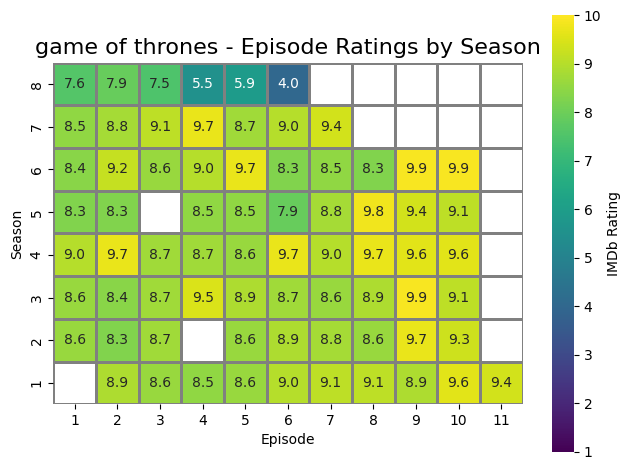

In [ ]:
# === Run your show search below ===

show_name = input("Enter the name of a TV show: ")
ratings_grid = fetch_episode_ratings(show_name)
plot_ratings_grid(ratings_grid, show_name)

In [ ]:
flat_ratings = [r for season in ratings_grid for r in season if not np.isnan(r)]
print(f"Min rating: {min(flat_ratings)}")
print(f"Max rating: {max(flat_ratings)}")

Min rating: 4.0
Max rating: 9.9
